In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder



In [2]:
ds = pd.read_csv("anonym_aamos00_environment.csv")
ds

,user_key,date,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,aqi,...,no,no2,o3,so2,pm2_5,pm10,nh3,grass_pollen,tree_pollen,weed_pollen
0,113,1,15.91,14.21,17.20,1015,88,0.89,53,1.0,...,0.19,8.65,47.92,2.89,7.55,8.51,0.82,High,Low,Moderate
1,113,2,16.67,14.92,18.71,1014,96,0.45,24,1.0,...,0.55,15.94,28.97,6.68,3.97,4.82,0.29,High,Moderate,High
2,113,3,17.07,15.00,18.31,1015,79,1.34,17,1.0,...,0.49,8.14,56.51,3.04,3.93,7.39,0.65,High,Moderate,High
3,113,4,18.08,15.22,20.13,1017,78,0.89,16,1.0,...,0.19,2.29,79.39,0.78,2.91,4.09,1.20,High,Moderate,Moderate
4,113,5,20.82,17.81,22.86,1015,86,1.79,135,1.0,...,0.11,4.84,78.68,1.85,8.35,9.05,1.63,High,Low,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,939,178,13.75,12.56,14.89,1025,86,1.54,300,1.0,...,0.07,4.11,54.36,1.31,3.42,5.83,1.05,Moderate,High,Low
1653,939,179,8.14,6.07,9.85,1027,83,2.06,360,1.0,...,0.02,3.68,57.22,1.07,2.27,5.07,1.81,Low,Low,Low
1654,939,180,10.09,8.75,11.49,1021,72,1.03,0,1.0,...,0.31,4.37,60.08,1.28,1.10,2.30,1.46,Moderate,High,Low
1655,939,181,8.19,6.72,10.40,1014,87,0.00,0,1.0,...,13.64,15.25,2.84,2.71,5.91,7.42,2.09,Low,Moderate,Low


In [3]:
cols_to_drop = ['user_key','date','aqi','grass_pollen','tree_pollen','weed_pollen']
ds = ds.drop(cols_to_drop, axis=1)
ds

,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,15.91,14.21,17.20,1015,88,0.89,53,161.89,0.19,8.65,47.92,2.89,7.55,8.51,0.82
1,16.67,14.92,18.71,1014,96,0.45,24,178.58,0.55,15.94,28.97,6.68,3.97,4.82,0.29
2,17.07,15.00,18.31,1015,79,1.34,17,153.54,0.49,8.14,56.51,3.04,3.93,7.39,0.65
3,18.08,15.22,20.13,1017,78,0.89,16,156.88,0.19,2.29,79.39,0.78,2.91,4.09,1.20
4,20.82,17.81,22.86,1015,86,1.79,135,163.56,0.11,4.84,78.68,1.85,8.35,9.05,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,13.75,12.56,14.89,1025,86,1.54,300,201.94,0.07,4.11,54.36,1.31,3.42,5.83,1.05
1653,8.14,6.07,9.85,1027,83,2.06,360,200.27,0.02,3.68,57.22,1.07,2.27,5.07,1.81
1654,10.09,8.75,11.49,1021,72,1.03,0,198.60,0.31,4.37,60.08,1.28,1.10,2.30,1.46
1655,8.19,6.72,10.40,1014,87,0.00,0,188.59,13.64,15.25,2.84,2.71,5.91,7.42,2.09


In [4]:
ds.reset_index(inplace=True)
ds.rename(columns={'index': 'ID'}, inplace=True)
ds

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,15.91,14.21,17.20,1015,88,0.89,53,161.89,0.19,8.65,47.92,2.89,7.55,8.51,0.82
1,1,16.67,14.92,18.71,1014,96,0.45,24,178.58,0.55,15.94,28.97,6.68,3.97,4.82,0.29
2,2,17.07,15.00,18.31,1015,79,1.34,17,153.54,0.49,8.14,56.51,3.04,3.93,7.39,0.65
3,3,18.08,15.22,20.13,1017,78,0.89,16,156.88,0.19,2.29,79.39,0.78,2.91,4.09,1.20
4,4,20.82,17.81,22.86,1015,86,1.79,135,163.56,0.11,4.84,78.68,1.85,8.35,9.05,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1652,13.75,12.56,14.89,1025,86,1.54,300,201.94,0.07,4.11,54.36,1.31,3.42,5.83,1.05
1653,1653,8.14,6.07,9.85,1027,83,2.06,360,200.27,0.02,3.68,57.22,1.07,2.27,5.07,1.81
1654,1654,10.09,8.75,11.49,1021,72,1.03,0,198.60,0.31,4.37,60.08,1.28,1.10,2.30,1.46
1655,1655,8.19,6.72,10.40,1014,87,0.00,0,188.59,13.64,15.25,2.84,2.71,5.91,7.42,2.09


In [5]:
print(ds.dtypes)

ID                   int64
temperature        float64
temperature_min    float64
temperature_max    float64
pressure             int64
humidity             int64
wind_speed         float64
wind_deg             int64
co                 float64
no                 float64
no2                float64
o3                 float64
so2                float64
pm2_5              float64
pm10               float64
nh3                float64
dtype: object


In [6]:
cols_to_convert = ['co', 'no', 'no2','o3','so2','pm2_5','pm10','nh3']
ds[cols_to_convert] = ds[cols_to_convert].astype(float)

In [7]:
print(ds.dtypes)

ID                   int64
temperature        float64
temperature_min    float64
temperature_max    float64
pressure             int64
humidity             int64
wind_speed         float64
wind_deg             int64
co                 float64
no                 float64
no2                float64
o3                 float64
so2                float64
pm2_5              float64
pm10               float64
nh3                float64
dtype: object


In [8]:
ds.loc[:, 'pm2_5'] = ds.loc[:, 'pm2_5'] * 10
ds.loc[:, 'pm10'] = ds.loc[:, 'pm10'] * 10
ds.loc[:, 'co'] = ds.loc[:, 'co'] / 100
ds

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,15.91,14.21,17.20,1015,88,0.89,53,1.6189,0.19,8.65,47.92,2.89,75.5,85.1,0.82
1,1,16.67,14.92,18.71,1014,96,0.45,24,1.7858,0.55,15.94,28.97,6.68,39.7,48.2,0.29
2,2,17.07,15.00,18.31,1015,79,1.34,17,1.5354,0.49,8.14,56.51,3.04,39.3,73.9,0.65
3,3,18.08,15.22,20.13,1017,78,0.89,16,1.5688,0.19,2.29,79.39,0.78,29.1,40.9,1.20
4,4,20.82,17.81,22.86,1015,86,1.79,135,1.6356,0.11,4.84,78.68,1.85,83.5,90.5,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1652,13.75,12.56,14.89,1025,86,1.54,300,2.0194,0.07,4.11,54.36,1.31,34.2,58.3,1.05
1653,1653,8.14,6.07,9.85,1027,83,2.06,360,2.0027,0.02,3.68,57.22,1.07,22.7,50.7,1.81
1654,1654,10.09,8.75,11.49,1021,72,1.03,0,1.9860,0.31,4.37,60.08,1.28,11.0,23.0,1.46
1655,1655,8.19,6.72,10.40,1014,87,0.00,0,1.8859,13.64,15.25,2.84,2.71,59.1,74.2,2.09


In [9]:
ds.isnull().sum()

ID                 0
temperature        0
temperature_min    0
temperature_max    0
pressure           0
humidity           0
wind_speed         0
wind_deg           0
co                 5
no                 5
no2                5
o3                 5
so2                5
pm2_5              5
pm10               5
nh3                5
dtype: int64

In [10]:
ds = ds.fillna(ds.mean())

In [11]:
ds.isnull().sum()

ID                 0
temperature        0
temperature_min    0
temperature_max    0
pressure           0
humidity           0
wind_speed         0
wind_deg           0
co                 0
no                 0
no2                0
o3                 0
so2                0
pm2_5              0
pm10               0
nh3                0
dtype: int64

In [12]:
#Calculating the Sub_Index Values for the air pollution and calculating the AQI

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
    
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0   
    
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0
    
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0
    
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

    
 ## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0   

In [13]:
ds["pm25_sub_index"] = ds["pm2_5"].apply(lambda x: get_PM25_subindex(x))
ds["pm10_sub_index"] = ds["pm10"].apply(lambda x: get_PM10_subindex(x))
ds["o3_sub_index"] = ds["o3"].apply(lambda x: get_O3_subindex(x))
ds["no2_sub_index"] = ds["no2"].apply(lambda x: get_NOx_subindex(x))
ds["so2_sub_index"] = ds["so2"].apply(lambda x: get_SO2_subindex(x))
ds["co_sub_index"] = ds["co"].apply(lambda x: get_CO_subindex(x))
ds.head()

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,...,so2,pm2_5,pm10,nh3,pm25_sub_index,pm10_sub_index,o3_sub_index,no2_sub_index,so2_sub_index,co_sub_index
0,0,15.91,14.21,17.20,1015,88,0.89,53,1.6189,0.19,...,2.89,75.5,85.1,0.82,151.666667,85.1,47.92,10.8125,3.6125,80.945
1,1,16.67,14.92,18.71,1014,96,0.45,24,1.7858,0.55,...,6.68,39.7,48.2,0.29,66.166667,48.2,28.97,19.9250,8.3500,89.290
2,2,17.07,15.00,18.31,1015,79,1.34,17,1.5354,0.49,...,3.04,39.3,73.9,0.65,65.500000,73.9,56.51,10.1750,3.8000,76.770
3,3,18.08,15.22,20.13,1017,78,0.89,16,1.5688,0.19,...,0.78,29.1,40.9,1.20,48.500000,40.9,79.39,2.8625,0.9750,78.440
4,4,20.82,17.81,22.86,1015,86,1.79,135,1.6356,0.11,...,1.85,83.5,90.5,1.63,178.333333,90.5,78.68,6.0500,2.3125,81.780


In [14]:
ds["AQI"] = round(ds[['pm25_sub_index', 'pm10_sub_index', 'o3_sub_index', 'no2_sub_index', 'so2_sub_index', 'co_sub_index']].max(axis = 1))
ds.head()

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,...,pm2_5,pm10,nh3,pm25_sub_index,pm10_sub_index,o3_sub_index,no2_sub_index,so2_sub_index,co_sub_index,AQI
0,0,15.91,14.21,17.20,1015,88,0.89,53,1.6189,0.19,...,75.5,85.1,0.82,151.666667,85.1,47.92,10.8125,3.6125,80.945,152.0
1,1,16.67,14.92,18.71,1014,96,0.45,24,1.7858,0.55,...,39.7,48.2,0.29,66.166667,48.2,28.97,19.9250,8.3500,89.290,89.0
2,2,17.07,15.00,18.31,1015,79,1.34,17,1.5354,0.49,...,39.3,73.9,0.65,65.500000,73.9,56.51,10.1750,3.8000,76.770,77.0
3,3,18.08,15.22,20.13,1017,78,0.89,16,1.5688,0.19,...,29.1,40.9,1.20,48.500000,40.9,79.39,2.8625,0.9750,78.440,79.0
4,4,20.82,17.81,22.86,1015,86,1.79,135,1.6356,0.11,...,83.5,90.5,1.63,178.333333,90.5,78.68,6.0500,2.3125,81.780,178.0


In [15]:
color_AQI = ["maroon", "purple", "red", "orange", "yellow","green"]

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Moderate"
    elif x <= 150:
        return "Unhealthy for sensitive groups"
    elif x <= 200:
        return "Unhealthy"
    elif x <= 300:
        return "Very unhealthy"
    elif x > 300:
        return "Hazardous"
    else:
        return np.NaN

In [16]:
ds["AQI_Explained"] = ds["AQI"].apply(lambda x: get_AQI_bucket(x))
ds.head()

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,...,pm10,nh3,pm25_sub_index,pm10_sub_index,o3_sub_index,no2_sub_index,so2_sub_index,co_sub_index,AQI,AQI_Explained
0,0,15.91,14.21,17.20,1015,88,0.89,53,1.6189,0.19,...,85.1,0.82,151.666667,85.1,47.92,10.8125,3.6125,80.945,152.0,Unhealthy
1,1,16.67,14.92,18.71,1014,96,0.45,24,1.7858,0.55,...,48.2,0.29,66.166667,48.2,28.97,19.9250,8.3500,89.290,89.0,Moderate
2,2,17.07,15.00,18.31,1015,79,1.34,17,1.5354,0.49,...,73.9,0.65,65.500000,73.9,56.51,10.1750,3.8000,76.770,77.0,Moderate
3,3,18.08,15.22,20.13,1017,78,0.89,16,1.5688,0.19,...,40.9,1.20,48.500000,40.9,79.39,2.8625,0.9750,78.440,79.0,Moderate
4,4,20.82,17.81,22.86,1015,86,1.79,135,1.6356,0.11,...,90.5,1.63,178.333333,90.5,78.68,6.0500,2.3125,81.780,178.0,Unhealthy


In [17]:
ds = ds[ds['AQI'] <= 700]
ds

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg,co,no,...,pm10,nh3,pm25_sub_index,pm10_sub_index,o3_sub_index,no2_sub_index,so2_sub_index,co_sub_index,AQI,AQI_Explained
0,0,15.91,14.21,17.20,1015,88,0.89,53,1.6189,0.19,...,85.1,0.82,151.666667,85.1,47.92,10.8125,3.6125,80.94500,152.0,Unhealthy
1,1,16.67,14.92,18.71,1014,96,0.45,24,1.7858,0.55,...,48.2,0.29,66.166667,48.2,28.97,19.9250,8.3500,89.29000,89.0,Moderate
2,2,17.07,15.00,18.31,1015,79,1.34,17,1.5354,0.49,...,73.9,0.65,65.500000,73.9,56.51,10.1750,3.8000,76.77000,77.0,Moderate
3,3,18.08,15.22,20.13,1017,78,0.89,16,1.5688,0.19,...,40.9,1.20,48.500000,40.9,79.39,2.8625,0.9750,78.44000,79.0,Moderate
4,4,20.82,17.81,22.86,1015,86,1.79,135,1.6356,0.11,...,90.5,1.63,178.333333,90.5,78.68,6.0500,2.3125,81.78000,178.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1652,13.75,12.56,14.89,1025,86,1.54,300,2.0194,0.07,...,58.3,1.05,57.000000,58.3,54.36,5.1375,1.6375,100.24250,100.0,Moderate
1653,1653,8.14,6.07,9.85,1027,83,2.06,360,2.0027,0.02,...,50.7,1.81,37.833333,50.7,57.22,4.6000,1.3375,100.03375,100.0,Moderate
1654,1654,10.09,8.75,11.49,1021,72,1.03,0,1.9860,0.31,...,23.0,1.46,18.333333,23.0,60.08,5.4625,1.6000,99.30000,99.0,Moderate
1655,1655,8.19,6.72,10.40,1014,87,0.00,0,1.8859,13.64,...,74.2,2.09,98.500000,74.2,2.84,19.0625,3.3875,94.29500,98.0,Moderate


<Figure size 1600x800 with 0 Axes>

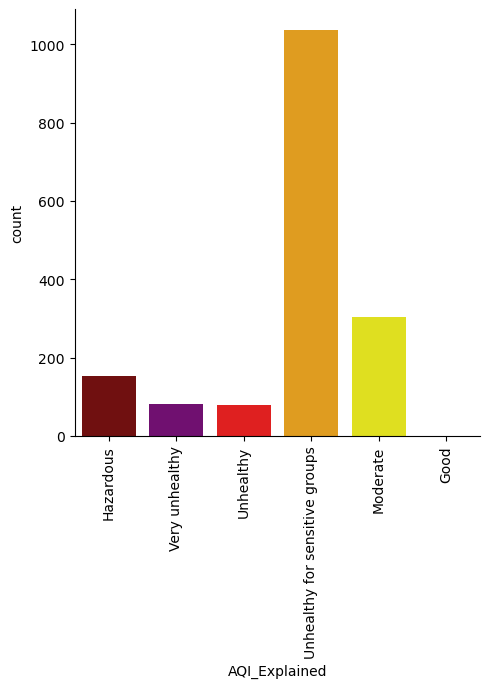

In [18]:
plt.figure(figsize=(16,8))
sns.set_palette(color_AQI)
category_order = ["Hazardous",
                 "Very unhealthy",
                  "Unhealthy",
                  "Unhealthy for sensitive groups",
                  "Moderate",
                  "Good"
                 ]

sns.catplot(x="AQI_Explained", data = ds, kind="count", order=category_order)

plt.xticks(rotation=90)
plt.show()

In [19]:
# Split the dataset into training and testing sets
X = ds.iloc[:, :8]
y = ds.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X

,ID,temperature,temperature_min,temperature_max,pressure,humidity,wind_speed,wind_deg
0,0,15.91,14.21,17.20,1015,88,0.89,53
1,1,16.67,14.92,18.71,1014,96,0.45,24
2,2,17.07,15.00,18.31,1015,79,1.34,17
3,3,18.08,15.22,20.13,1017,78,0.89,16
4,4,20.82,17.81,22.86,1015,86,1.79,135
...,...,...,...,...,...,...,...,...
1652,1652,13.75,12.56,14.89,1025,86,1.54,300
1653,1653,8.14,6.07,9.85,1027,83,2.06,360
1654,1654,10.09,8.75,11.49,1021,72,1.03,0
1655,1655,8.19,6.72,10.40,1014,87,0.00,0


In [21]:
y

0       Unhealthy
1        Moderate
2        Moderate
3        Moderate
4       Unhealthy
          ...    
1652     Moderate
1653     Moderate
1654     Moderate
1655     Moderate
1656     Moderate
Name: AQI_Explained, Length: 1656, dtype: object

In [22]:
##Gradient Boosting Machines (GBM) model
# Train the GBM model with default hyperparameters
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7344064386317908


In [23]:
print(X_train.shape) 
print(y_train.shape) 

(1159, 8)
(1159,)
